In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn import preprocessing
import numpy as np
from anytree import Node, RenderTree,NodeMixin
from anytree.exporter import DotExporter

In [2]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [4]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [6]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [9]:
udo = Node("Udo")
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)

In [10]:
for pre, fill, node in RenderTree(udo):
    print("%s%s" % (pre, node.name))

Udo
├── Marc
│   └── Lian
└── Dan
    └── Jet


In [15]:
a = Node("a",**{'p':1,'q':2})

In [17]:
b = Node("b",parent=a, **{'p':1,'q':2})

In [18]:
for pre, fill, node in RenderTree(a):
    print("%s%s" % (pre, node.name))

a
└── b


In [19]:
a.

Node('/a', p=1, q=2)

In [20]:
udo

Node('/Udo')

In [2]:
class FieldTransform(NodeMixin):
    function_name: str = None
    scalar: object = None
    scalar_type: str = None  # This can be MinMaxScaler or StandardScaler
    encoder: object = None
    encoder_type: str = None  # This can be OneHotEncoder or LabelEncoder
    from_field: str = None  # field name before transformation
    to_fields: str = []  # field names after transformation
        

class FieldTransformNode(FieldTransform, NodeMixin):  # Add Node feature
    def __init__(self, name, parent=None, children=None
                 , function_name:str = None, scalar: object = None, scalar_type: str = None
                 , encoder:object = None, encoder_type: str = None
                 , from_field: str = None, to_fields: list = None     
                ):
        super(FieldTransformNode, self).__init__()
        self.name = name
        self.parent = parent
        if children:
            self.children = children
        self.function_name = function_name
        self.scalar = scalar
        self.scalar_type = scalar_type
        self.encoder = encoder
        self.encoder_type = encoder_type
        self.from_field = from_field
        self.to_fields = to_fields

In [3]:
a = FieldTransformNode('a',scalar=StandardScaler(),scalar_type='scalar_type')
b = FieldTransformNode('b',parent=a,scalar=StandardScaler(),scalar_type='scalar_type')
c = FieldTransformNode('c',parent=a,scalar=StandardScaler(),scalar_type='scalar_type')
for pre, _, node in RenderTree(a):
    treestr = u"%s%s" % (pre, node.name)
    print(treestr.ljust(8),node.scalar)


a        StandardScaler(copy=True, with_mean=True, with_std=True)
├── b    StandardScaler(copy=True, with_mean=True, with_std=True)
└── c    StandardScaler(copy=True, with_mean=True, with_std=True)


In [4]:
x = print(RenderTree(a))

├── <__main__.FieldTransformNode object at 0x7f3a92a0a0d0>
└── <__main__.FieldTransformNode object at 0x7f3a92a0a210>


In [56]:
for pre, fill, node in RenderTree(a):
    treestr = u"%s%s" % (pre, node.name)
    print(treestr.ljust(8))

a       


In [64]:
class MyBaseClass(object):  # Just an example of a base class
    foo = 4

class MyClass(MyBaseClass, NodeMixin):  # Add Node feature
    def __init__(self, name, parent=None, children=None, foo=0):
        super(MyClass, self).__init__()
        self.name = name
#         self.length = length
#         self.width = width
        self.parent = parent
        if children:
            self.children = children
        self.foo = foo

In [68]:
my0 = MyClass('my0', foo = 2)
my1 = MyClass('my1', parent=my0, foo = 4)
my2 = MyClass('my2', parent=my0 , foo = 6)
my3 = MyClass('my2', parent=my2 , foo = 8)
for pre, _, node in RenderTree(my0):
    treestr = u"%s%s" % (pre, node.name)
    print(treestr.ljust(8),node.foo)


my0      2
├── my1  4
└── my2  6
    └── my2 8


In [73]:
my0.children[0].foo

4

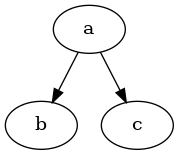

In [11]:
DotExporter(a).to_picture('udo.png')
from IPython.display import Image
Image('udo.png')

In [85]:
a

In [5]:
class TypeTransformedData:
    data_type: int = None
    run: bool = True
    srs: pd.Series = None
    srs_out: pd.Series = None
    success_count: float = None
    percentage: float = None
    threshold: float = 80
    sample_size: float = 5
    iterations: int = 3

    def __init__(self, srs: pd.Series, run: bool = True, **kwargs):
        self.srs = srs
        self.run = self.run if run is None else run
        self._import_kwargs(**kwargs)

    def _import_kwargs(self, **kwargs):
        ignored_keys = set(['srs', 'run'])
        self.__dict__.update((key, value) for key, value in kwargs.items() if key not in ignored_keys)

srs = pd.Series([1,2,3,4])
paras = {
    'threshold': 10,
    'iterations': 5
}

obj = TypeTransformedData(srs=srs,**paras)
display(obj.threshold)
display(obj.iterations)

10

5